# Support Vector Machine

- **Mathematics behind Support Vector Machines** 
    - Length of a Vector, Direction of a Vector, Dot Product
    - Linear Separability, Concept of HyperPlane, Classifier
    - [Video Link](https://www.youtube.com/watch?v=y0_Qq6fXzCs)
- **Support Vector Machines (SVM) Overview**
    - Maximum Margin Classifier 
    - Overview and Intuition 
    - Soft and Hard Margin
    - [Video Link 1](https://www.youtube.com/watch?v=ugTxMLjLS8M&list=PLKnIA16_RmvbOIFee-ra7U6jR2oIbCZBL)
    - [Video Link 2](https://www.youtube.com/watch?v=efR1C6CvhmE)
    - [Video Link 3](https://www.youtube.com/watch?v=1NxnPkZM9bc)
- **Hard SVM**
    - Hard SVM – Mathematical Formulation
    - Hard SVM – Optimization Problem Formulation
    - Formulation of Dual Problem using Lagrange Multipliers
    - Issues with hard SVM
    - [Video Link 1](https://www.youtube.com/watch?v=yCAlHPDgWtM)
    - [Video Link 2](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html)
    - [Video Link 3](https://www.youtube.com/watch?v=A7FeQekjd9Q)
    - [Reading Link 1](https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e)
    - [Reading Link 2](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
- **Soft SVM**
    - [Video Link 1](https://www.youtube.com/watch?v=utqrvIFAE1k)
    - [Video Link 2](https://www.youtube.com/watch?v=7vSGI9FCCaY)
- **Kernel Trick**
    - [Video Link](https://www.youtube.com/watch?v=egxjT0p7_K8)
    - [Reading Link](https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d)
- **OvR SVM classifier for Multi-class classification**
    - [Video Link](https://www.youtube.com/watch?v=bW3PUCpj_AE)


- **SVM: Python Implementation**
- **SVM: Scikit-learn implementation**
- **Interview Questions**
- **Industrial Applications of SVM**
- **Project**

## Mathematics behind Support Vector Machines

Before we get into the SVM algorithm, let’s first talk about some definitions we need to use later.

#### Length of a vector

The length of a vector $\mathbf x$ is called its norm, which is written as $||\mathbf{x}||$. The Euclidean norm formula to calculate the norm of a vector $ \mathbf{x} = (x_1,x_2,...,x_n)$ is:

$$||x|| = \sqrt{x_1^2+x_2^2+...+x_n^2}$$

#### Direction of a Vector
The direction of a vector $\mathbf{x} = (x_1, x_2)$ is written as $\mathbf{w}$ and defined as :

$$w = (\frac{x_1}{||x||},\frac{x_2}{||x||})$$

If we look at below figure, we can see that $cos(\theta)=\frac{x_1}{\|x\|}$ and $cos(\alpha)=\frac{x_2}{\|x\|}$. Thus, the direction vector $\mathbf{w}$ can also be written as:
$$w = (cos(\theta), cos(\alpha))$$
<img src="images/j2.jpg" height =300px width=300px align="center">

> It is worth noting that the norm of a direction vector is always equal to `1`. Because of this, the direction vector $\mathbf{w}$ is also called the unit vector.

#### Dot product
The dot product of two vectors returns a scalar. It gives us some insights into how the two vectors are related.

Below figure shows two vectors $\mathbf{x}$ and $\mathbf{y}$ and the angle $θ$ between them. The geometric formula of dot product is defined as:

$$x \cdot y = ||x||\space||y||\space cos(\theta)$$

<img src="images/j1.jpg" height = 500px width=500px align="center">


By looking at below figure, we can see $\theta = \beta-\alpha$. Then we can get:

$$cos(\theta) = cos(\beta-\alpha)\\
                =cos\beta cos\alpha+sin\beta sin\alpha \\
                =\frac{x_1}{||x||}\frac{y_1}{||y||}+\frac{x_2}{||x||}\frac{y_2}{||y||} \\
                =\frac{x_1y_1+x_2y_2}{||x||\space ||y||}$$
                
<img src="images/j3.jpg" height = 350px width=350px align="center">
                
                
We substitute this into the geometric dot product formula, we get:
$$x \cdot y = ||x||\space||y||\space \frac{x_1y_1+x_2y_2}{||x||\space ||y||} = x_1y_1+x_2y_2$$

> This is the `algebraic formula` of dot product. 

In general, dot product can be computed as the following for two `n-dimensional vectors`:
$$x \cdot y = \sum_{i=1}^{n}x_iy_i$$


### Linear separability

Linear separability is one important concept in `SVM`. Although in practical cases the data might not be linearly separable, we will start from the linearly separable cases (since they are easy to understand and deal with) and then derive the non-linearly separable cases.

First Figure shows the two-dimensional data are separated by a `line`. In this case, we say the data are linearly separable. Second figure is an example of non-linearly separable data, which means we can not find a line to separate the two-dimensional data. Similarly, for three-dimensional data, we say the data are linearly separable if we can find a `plane` to separate them.

<img src="images/j6.jpg" height = 500px width=500px align="center">


### Hyperplane
Then, the question arises when there are more than three dimensions. What do we use to separate the multi-dimensional data? We use **hyperplane**. How could we define a hyperplane?

Let’s look at the two-dimensional case first. The two-dimensional linearly separable data can be separated by a line. The function of the line is $y=ax+b$. We rename x with $x_1$ and y with $x_2$ and we get:

$$ax_1-x_2+b=0$$

If we define $\mathbf{x} = (x_1, x_2)$ and $\mathbf{w} = (a,-1)$, we get:
$$w\cdot x + b =0$$ Or

$$w^Tx+b=0$$

> This equation is derived from two-dimensional vectors. But in fact, it also works for any number of dimensions. This is the equation of the hyperplane.

<img src="images/p2.png" height = 500px width=500px align="center">


### Classifier

Once we have the hyperplane, we can then use the hyperplane to make predictions. We define the hypothesis function $\mathbf{h}$ as:

$$h(x_i) =
    \begin{cases}
    +1 & if \space w^T x + b \ge 0 \\
    -1 & if \space w^T x + b < 0
    \end{cases}$$
    
The point above or on the hyperplane will be classified as `class +1`, and the point below the hyperplane will be classified as `class -1`.

**Goal of SVM**
- So basically, the goal of the SVM learning algorithm is to find a `hyperplane` which could separate the data accurately. There might be many such `hyperplanes`. And we need to find the best one, which is often referred as the **optimal hyperplane.**

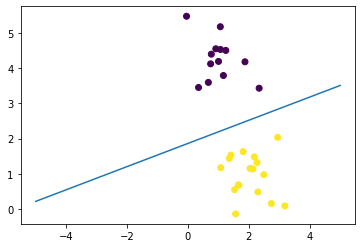

In [12]:
# implementation of hyperplane
from sklearn import svm

# create the SVM model
clf = svm.SVC(kernel='linear', C=1)

# train the model
clf.fit(X_train, y_train)

# get the parameters of the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the hyperplane
plt.plot(xx, yy)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()


**Explanation:**

- Above code first creates an `SVM` model with a `linear kernel` using the SVC class from the svm module and trains it on the training data. Then, it gets the parameters of the hyperplane by accessing the `coef_` attribute of the trained model, which contains the coefficients of the hyperplane, and the `intercept_` attribute, which contains the bias term.
- Then, it creates a grid of points to plot the hyperplane by generating a range of x-values and calculating the corresponding y-values using the parameters of the hyperplane. Finally, it plots the hyperplane and the data points on the same graph.

<h2 align="center">Support Vector Machines(SVM)</h2>

### Overview - Maximum Margin Classifier

**Intuition:**

Consider `2` clusters of points as below. It is possible to draw many `lines/Hyperplanes` to separate out the two set of points. Which `line/decision boundary` will **best** separate the 2 categories in unseen data points?

For the best separating line, consider the margin possible for each of the lines. The one with the `maximum margin` is the one that separates best. In the diagram below, `middle line` has the maximum margin. Hence, it separates the 2 set of points better.

<img src="images/p5.png" align="center">


With this intuition, let us try to formalize how to determine the the line with the maximum margin. Extending the problem to `n dimensions`, question becomes how to determine the `hyperplane` with `maximum margin`.

Separating hyperplane can be considered as `street`. We are trying to maximise the `width` of the street (the green shaded area above). `Street` is framed by `gutters` lying at ends of the street.


<img src="images/j8.jpg" align="center">


**Support Vectors:**
- Support vectors are the data points that are `closest` to the `hyperplane` and have the greatest impact on the position of the hyperplane. These points are the most critical points in determining the position of the hyperplane.

- It's the support vectors that are used to define the hyperplane. SVM algorithm finds the hyperplane that `maximizes` the distance between the support vectors of the different classes. Support vectors are the points that lies on the `margin` or in the `gutters`, but not all the points in the gutters are support vectors.

**Gutters:**
- Gutters refer to the area between the margins, which is the distance between the hyperplane and the closest data points from each class. The `width` of the gutters is equal to `twice` the margin.
- The hyperplane is defined by the support vectors, but the gutters are defined by the hyperplane. In other words, support vectors are used to find the hyperplane, and the hyperplane is used to define the gutters.

**Margin:**


**Characteristics of Best Decision Boundary:**

In [13]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# load the dataset
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [14]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# create the SVM model with a linear kernel
clf = svm.SVC(kernel='linear', C=1)

# train the model
clf.fit(X_train, y_train)

# predict on the test set
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [15]:
# evaluate the model
score = clf.score(X_test, y_test)
print("Accuracy:", score)


Accuracy: 1.0


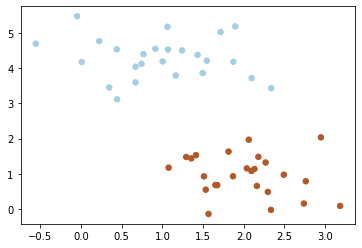

In [16]:
# plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

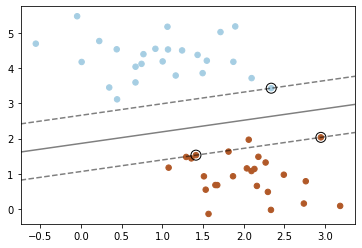

In [19]:
# plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [1]:
from sklearn.svm import SVC

In [5]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Advantages and Disadvantages of SVM:

#### Advantages:

- `Effective in high dimensional spaces:` SVM is effective in high dimensional spaces, which means that it can handle a large number of features and work well even when the number of features is greater than the number of samples.

- `Memory efficient:` SVM is memory efficient, as it only stores the support vectors, which are the data points that are closest to the decision boundary.

- `Robust to outliers:` SVM is robust to outliers, which means that it is less affected by the presence of a few data points that deviate from the general pattern.

- `Non-linear decision boundaries:` SVM can model non-linear decision boundaries by using kernel functions, which map the data into a higher-dimensional space where it becomes linearly separable.

- `Versatile:`  SVM can be applied to a wide range of problems, including classification, regression, and outlier detection.

#### Disadvantages:

- `Complex optimization problem:` The training process of SVM can be computationally intensive, as it involves solving a complex optimization problem to find the optimal decision boundary.

- `Requires careful preprocessing:` SVM is sensitive to the scaling of the data, so it requires careful preprocessing, such as normalization, to ensure optimal performance.

- `Requires choosing a good kernel function:` SVM requires choosing a good kernel function to model non-linear decision boundaries, which can be challenging and time-consuming.

- `Limited to small datasets:` SVM is not suitable for large datasets, as the training process can be computationally intensive and time-consuming.

- `Hard to interpret:` SVM models can be hard to interpret, as the decision boundary is represented by a complex mathematical function, and it can be difficult to understand the relationship between the features and the decision boundary.

## Important Interview Questions of SVM
- Can you explain the concept of a hyperplane in SVM?
- How does SVM handle non-linearly separable data?
- Can you explain the role of the kernel function in SVM?
- How does SVM choose the optimal hyperplane?
- How is the regularization parameter in SVM related to the trade-off between maximizing the margin and minimizing the misclassification rate?
- Can you explain the difference between a linear and a non-linear SVM?
- How does SVM handle multi-class classification problems?
- Can you explain how the optimization problem in SVM is formulated and how it is solved?
- Can you explain the concept of the dual problem in SVM and its significance in computational efficiency?
- Can you explain the concept of hard margin and soft margin in SVM?
- How does SVM handle non-linearly separable data using kernel trick?
- Can you explain how different kernel functions like polynomial, radial basis function, and sigmoid affect the classifier?
- How do you evaluate the performance of a SVM model?
- How do you handle imbalanced data in SVM?
- How does SVM handle missing values or outliers in the data?

## Applications of SVM

Support Vector Machines (SVMs) have a wide range of applications in various industries, some of the most common use cases include:

- **Image classification:** SVMs are commonly used in image classification tasks, such as recognizing handwritten digits or classifying images of objects.
- **Text classification:** SVMs are also used in natural language processing tasks, such as document classification and sentiment analysis.
- **Bioinformatics:** SVMs are used in bioinformatics to classify proteins, predict the effects of genetic variations and classify DNA sequences.
- **Stock market prediction:** SVMs have been used to predict stock prices or identify patterns in financial data.
- **Fraud detection:** SVMs can be used to identify fraudulent transactions in credit card or financial data.
- **Handwriting recognition:** SVMs are used in handwriting recognition systems to classify handwritten characters and digits.
- **Medical diagnosis:** SVMs are used to diagnose diseases by analyzing patient data, such as analyzing medical images or genetic data.
- **Quality control:** SVMs are used to classify items as defective or non-defective in manufacturing industries
- **Human resource management:** SVMs are used to analyze employee data and predict the potential of employees for promotion or identify high-risk employees.
- **Cybersecurity:** SVMs are used to detect and classify intrusion attempts in computer networks and identify malicious software.